# Sampling from a model trained on ACDC dataset

**Authors :**
* _Louis Lacroix_
* _Benjamin Ternot_

## I. Importing Libraries and Global Settings

In [5]:
import datetime
from functools import partial
import os

import torch

from data_manager.datamanager import DataDisplayer
from models.model import Unet
from models.modeltrainer import DiffusionModelSampler, Diffusion
from utils.utils import VerboseLevel

In [6]:
# Define the root resources folder
ROOT_RES_FOLDER = os.path.join(os.path.dirname(os.getcwd()), 'resources')

# Parameters to use for loading the model
MODEL_DATETIME = "2025-01-13-19-48" # Date and time of the model format : "YYYY-mm-dd-HH-MM"
MODEL_NAME = "best-epoch-99" # Name of the model (e.g. 'best-epoch-46')
MODEL_LOAD_PATH = os.path.join(ROOT_RES_FOLDER, "trained_models",f"{MODEL_DATETIME}_4-channels",f"{MODEL_NAME}_unet.pt")
PARAMS_LOAD_PATH = os.path.join(ROOT_RES_FOLDER, "trained_models",f"{MODEL_DATETIME}_4-channels",f"params.txt")

current_datetime = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")

# Parameters for saving images
SAVE_IMAGES_FOLDER = os.path.join(ROOT_RES_FOLDER, "images",f"{MODEL_DATETIME}_4-channels","sampling",MODEL_NAME,current_datetime)
SAVE_IMAGES_PATH = os.path.join(SAVE_IMAGES_FOLDER, "{}")

# Create folders to save the images
os.makedirs(SAVE_IMAGES_FOLDER, exist_ok=True)

VERBOSE=VerboseLevel.DISPLAY
# VerboseLevel.NONE to avoid outputs
# VerboseLevel.TQDM to use tqdm progress bars
# VerboseLevel.PRINT to print information
# VerboseLevel.DISPLAY to display images

# Execution parameters
CUDA_DEVICE = 1

In [7]:
DEVICE = torch.device(f"cuda:{CUDA_DEVICE}" if torch.cuda.is_available() else "cpu")

## II. Loading the model

In [8]:
diffusion_model_sampler = DiffusionModelSampler(
    path_params=PARAMS_LOAD_PATH,
    path_model=MODEL_LOAD_PATH,
    device=DEVICE,
    model_class=Unet,
    model_params={'init_dim':None, 'out_dim':None, 'with_time_emb':True, 'convnext_mult':2},
    constants_scheduler=partial(Diffusion.cosine_beta_schedule, s=0.008),
    verbose=VERBOSE
)

Parameters loaded from '/home/infres/bternot-21/PRIM-AI-Diffusion-Models-for-Cardiac-Images/resources/trained_models/2025-01-13-19-48_4-channels/params.txt'

Loaded Parameters:
- IMAGE_SIZE: 16 <class 'int'>
- CHANNELS: 4 <class 'int'>
- BATCH_SIZE: 64 <class 'int'>
- EPOCHS: 100 <class 'int'>
- T: 1000 <class 'int'>
- DIM_MULTS: (1, 2, 4) <class 'tuple'>
Model loaded from '/home/infres/bternot-21/PRIM-AI-Diffusion-Models-for-Cardiac-Images/resources/trained_models/2025-01-13-19-48_4-channels/best-epoch-99_unet.pt'


In [9]:
generated_images = diffusion_model_sampler.sample_images()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

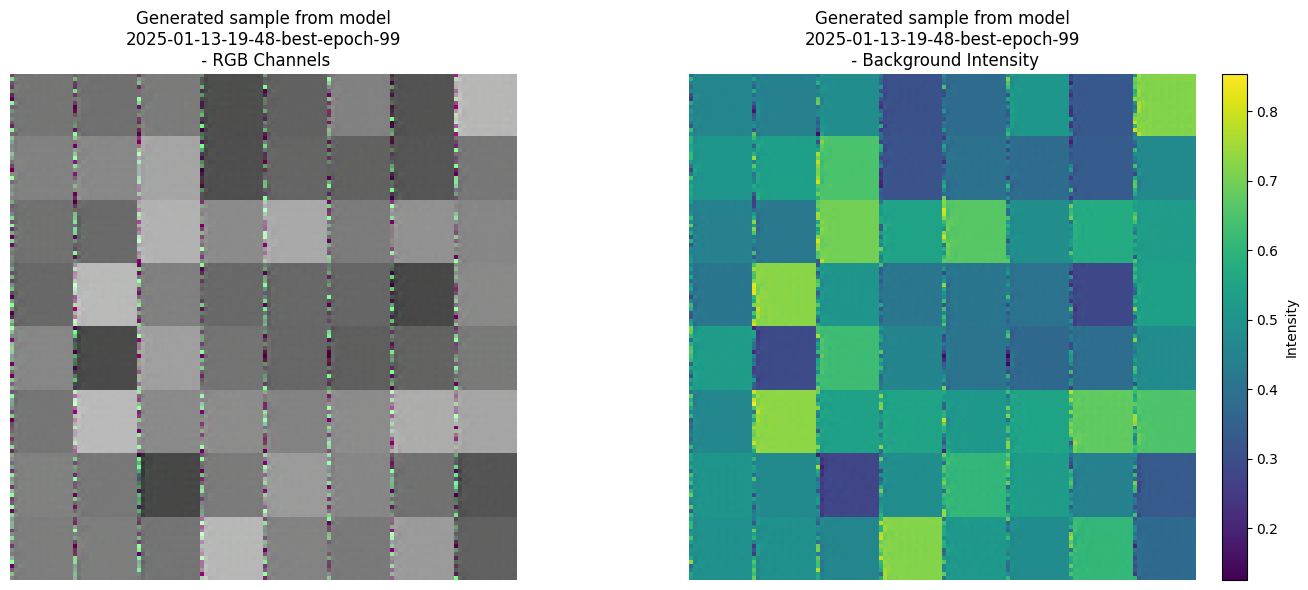

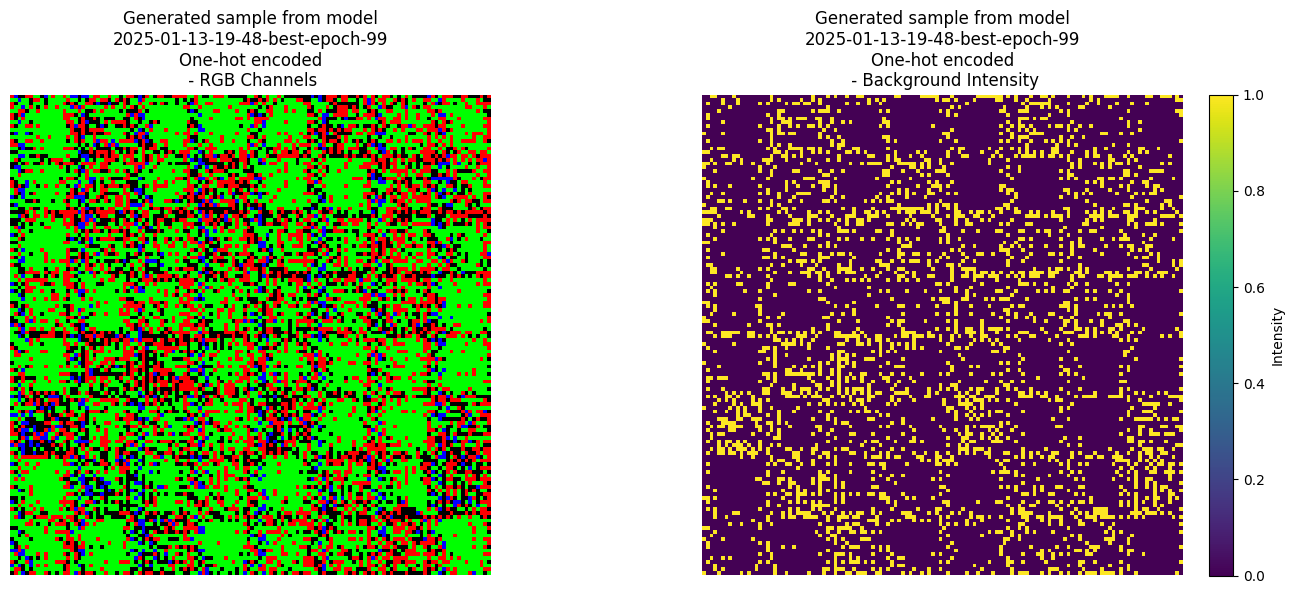

In [10]:
# Display the generated images
DataDisplayer.display_batch(
    batch=generated_images[-1],
    show=VERBOSE >= VerboseLevel.DISPLAY,
    #filename= SAVE_IMAGES_PATH.format("generated-batch.jpg"),
    title=f"Generated sample from model\n{MODEL_DATETIME}-{MODEL_NAME}\n",
    one_hot_encode=False
)
DataDisplayer.display_batch(
    batch=generated_images[-1],
    show=VERBOSE >= VerboseLevel.DISPLAY,
    #filename= SAVE_IMAGES_PATH.format("generated-batch-one-hot.jpg"),
    title=f"Generated sample from model\n{MODEL_DATETIME}-{MODEL_NAME}\nOne-hot encoded\n",
    one_hot_encode=True
)

Saved GIF at /home/infres/bternot-21/PRIM-AI-Diffusion-Models-for-Cardiac-Images/resources/images/2025-01-13-19-48_4-channels/sampling/best-epoch-99/2025-01-13-20-14/generated.gif.png.


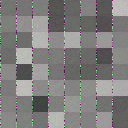

Saved GIF at /home/infres/bternot-21/PRIM-AI-Diffusion-Models-for-Cardiac-Images/resources/images/2025-01-13-19-48_4-channels/sampling/best-epoch-99/2025-01-13-20-14/generated-one-hot.gif.png.


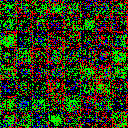

In [11]:
# Display the gif of the generated images
DataDisplayer.make_gif(
    frame_list=generated_images,
    filename=SAVE_IMAGES_PATH.format("generated.gif.png"),
    step=len(generated_images)//50,
    one_hot_encode=False,
    verbose=VERBOSE
)

# Display the gif of the generated images one-hot encoded
DataDisplayer.make_gif(
    frame_list=generated_images,
    filename=SAVE_IMAGES_PATH.format("generated-one-hot.gif.png"),
    step=len(generated_images)//50,
    one_hot_encode=True,
    verbose=VERBOSE
)